In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
fd_train = pd.read_csv("data/Train.csv")
fd_train

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0


In [5]:
less_than_10 = fd_train[(fd_train['target'] <= 10) & (fd_train['target'] > 0)]


In [6]:
less_than_10.sort_values(by='target', ascending=True, inplace=True)

In [7]:
less_than_10

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
101039,train_id_101039,2018-11-15,TU 0209,NTE,TUN,2018-11-15 17:50:00,2018-11-15 20.10.00,ATA,TU 32AIMP,1.0
44993,train_id_44993,2017-04-12,TU 0931,MRS,TUN,2017-04-12 08:50:00,2017-04-12 10.25.00,ATA,TU 32AIML,1.0
17249,train_id_17249,2016-02-03,TU 0724,TUN,MRS,2016-02-03 18:30:00,2016-02-03 20.50.00,ATA,TU 32AIML,1.0
94249,train_id_94249,2018-06-01,TU 0965,CDG,SFA,2018-06-01 09:10:00,2018-06-01 11.55.00,ATA,TU 736IOK,1.0
81363,train_id_81363,2018-07-09,TU 0751,LYS,TUN,2018-07-09 10:40:00,2018-07-09 12.35.00,ATA,TU 32AIMH,1.0
...,...,...,...,...,...,...,...,...,...,...
75425,train_id_75425,2018-02-09,TU 0635,ORY,DJE,2018-02-09 17:20:00,2018-02-09 20.10.00,ATA,TU 736IOK,10.0
75450,train_id_75450,2018-02-10,TU 0251,NCE,MIR,2018-02-10 14:05:00,2018-02-10 15.50.00,ATA,TU 736IOL,10.0
26189,train_id_26189,2016-11-08,TU 0701,ZRH,TUN,2016-11-08 12:00:00,2016-11-08 14.10.00,ATA,TU 32AIMM,10.0
75284,train_id_75284,2018-03-03,TU 0895,HAM,MIR,2018-03-03 17:30:00,2018-03-03 20.35.00,ATA,TU 736IOR,10.0


DATOP - Date of flight
FLTID - Flight number
DEPSTN - Departure point
ARRSTN - Arrival point
STD - Scheduled Time departure
STA - Scheduled Time arrival
STATUS - Flight status
ETD - Expected Time departure
ETA - Expected Time arrival
ATD - Actual Time of Departure
ATA - Actual Time of arrival
DELAY1 - Delay code 1
DUR1 - delay time 1
DELAY2 - Delay code 2
DUR2 - delay time 2
DELAY3 - Delay code 3
DUR3 - delay time 3
DELAY4 - Delay code 4
DUR4 - delay time 4
AC - Aircraft Code

ATA: Actual Time of Arrival (flight has arrived)
DEP: Departed (flight has left the departure point)
RTR: Returned (flight returned to origin after departure)
SCH: Scheduled (flight is scheduled, not yet departed)
DEL: Delayed (flight is delayed)

In [8]:
columns = ['id', 'date', 'flight_id', 'departure_point', 'arrival_point', 'departure_time', 'arrival_time', 'flight_status', 'aircraft_code', 'target']
fd_train.columns = columns

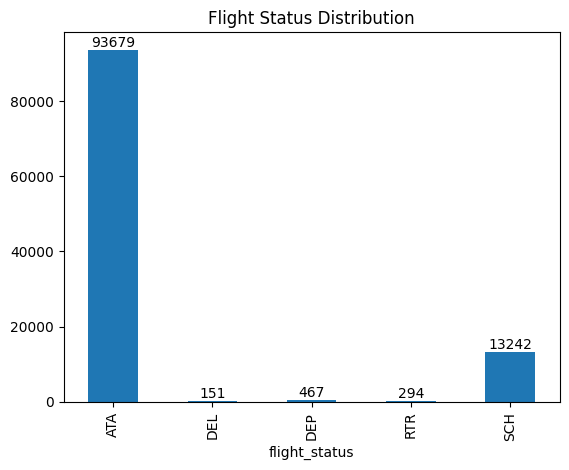

In [9]:
import matplotlib.pyplot as plt

ax = fd_train.groupby("flight_status").size().plot(kind='bar', title='Flight Status Distribution')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')
plt.show()

In [10]:
import pandas as pd

fd_train['departure_time'] = pd.to_datetime(fd_train['departure_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
fd_train['arrival_time'] = pd.to_datetime(fd_train['arrival_time'], format='%Y-%m-%d %H.%M.%S', errors='coerce')

In [11]:
fd_train['duration'] = (pd.to_datetime(fd_train['arrival_time']) - pd.to_datetime(fd_train['departure_time'])).dt.total_seconds()

In [12]:
fd_test = pd.read_csv("data/Test.csv")
fd_test

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ
...,...,...,...,...,...,...,...,...,...
9328,test_id_9328,2018-09-12,TU 0998,TUN,NCE,2018-09-12 14:15:00,2018-09-12 15.45.00,ATA,TU 320IMV
9329,test_id_9329,2018-09-27,WKL 0000,TUN,TUN,2018-09-27 22:00:00,2018-09-28 01.00.00,SCH,TU 32AIMG
9330,test_id_9330,2018-09-03,UG 1601,SJJ,TUN,2018-09-03 09:20:00,2018-09-03 11.10.00,SCH,TU CR9ISA
9331,test_id_9331,2018-09-15,UG 0008,TUN,DJE,2018-09-15 14:30:00,2018-09-15 15.30.00,SCH,UG AT7LBD


In [13]:
final_df = fd_train[fd_train["duration"] < 68400]

<Axes: >

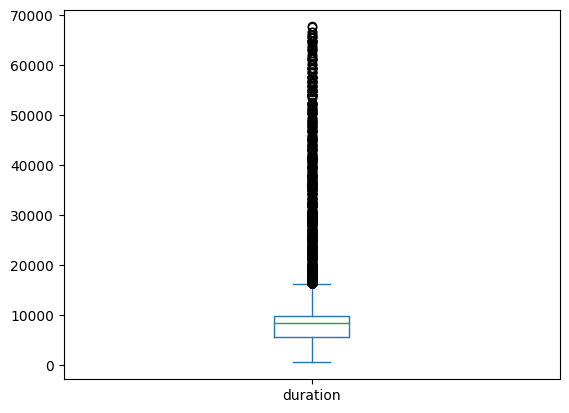

In [14]:
final_df['duration'].plot(kind='box', showfliers=True)

In [15]:
num_col = ['duration']
cat_col = ['departure_point', 'arrival_point', 'flight_status', 'aircraft_code']

In [16]:
dummies = pd.get_dummies(final_df[cat_col], drop_first=True)

In [17]:
dummies

,departure_point_AAL,departure_point_ABJ,departure_point_ADB,departure_point_AHU,departure_point_ALG,departure_point_AMM,departure_point_AMS,departure_point_ARN,departure_point_ATH,departure_point_AYT,...,aircraft_code_TU CR9ISA,aircraft_code_TU CR9XXX,aircraft_code_UG AT7AT7,aircraft_code_UG AT7LBD,aircraft_code_UG AT7LBE,aircraft_code_UG CR9CR9,aircraft_code_UG CR9ISA,aircraft_code_UG CR9XXX,aircraft_code_UJ 320TCF,aircraft_code_X9 320VEB
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
107829,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
107830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
107831,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [18]:
final_df = final_df.join(dummies)

In [19]:
y = final_df['target']
X = final_df.drop(columns=['id', 'date', 'flight_id', 'departure_time', 'arrival_time', 'target'] + cat_col)


In [20]:
X.head()

,duration,departure_point_AAL,departure_point_ABJ,departure_point_ADB,departure_point_AHU,departure_point_ALG,departure_point_AMM,departure_point_AMS,departure_point_ARN,departure_point_ATH,...,aircraft_code_TU CR9ISA,aircraft_code_TU CR9XXX,aircraft_code_UG AT7AT7,aircraft_code_UG AT7LBD,aircraft_code_UG AT7LBE,aircraft_code_UG CR9CR9,aircraft_code_UG CR9ISA,aircraft_code_UG CR9XXX,aircraft_code_UJ 320TCF,aircraft_code_X9 320VEB
0,8700.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6600.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9300.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,10200.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4800.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
import sklearn.dummy as dummyregression
base_model = dummyregression.DummyRegressor(strategy='mean')

base_model.fit(X_train, y_train)

DummyRegressor()

In [23]:
y_pred = base_model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def plot_actual_Vs_predicted(y_test, y_pred):
    # Visualize predictions vs actual
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual Delay')
    plt.ylabel('Predicted Delay')
    plt.title('Actual vs Predicted Delay')
    plt.show()

def model_score(model, y_test, y_pred):
    # Print model scores
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{type(model).__name__}: Root Mean Squared Error: {rmse:.2f}")    
    print(f"{type(model).__name__}: R2 Score: {r2:.2f}")

DummyRegressor: Root Mean Squared Error: 118.05
DummyRegressor: R2 Score: -0.00


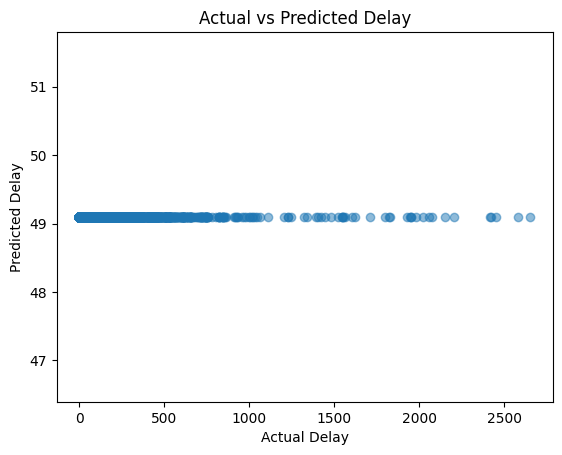

In [25]:
model_score(base_model, y_test, y_pred)
plot_actual_Vs_predicted(y_test, y_pred)

In [26]:
all_zeros = final_df[final_df['target'] == 0]
all_zeros

,id,date,flight_id,departure_point,arrival_point,departure_time,arrival_time,flight_status,aircraft_code,target,...,aircraft_code_TU CR9ISA,aircraft_code_TU CR9XXX,aircraft_code_UG AT7AT7,aircraft_code_UG AT7LBD,aircraft_code_UG AT7LBE,aircraft_code_UG CR9CR9,aircraft_code_UG CR9ISA,aircraft_code_UG CR9XXX,aircraft_code_UJ 320TCF,aircraft_code_X9 320VEB
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,...,False,False,False,False,False,False,False,False,False,False
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,...,False,False,False,False,False,False,False,False,False,False
12,train_id_12,2016-01-20,TU 0913,TUN,MED,2016-01-20 19:40:00,2016-01-21 00:00:00,ATA,TU 320IMR,0.0,...,False,False,False,False,False,False,False,False,False,False
13,train_id_13,2016-01-21,TU 0217,IST,TUN,2016-01-21 20:10:00,2016-01-21 23:00:00,ATA,TU 320IMU,0.0,...,False,False,False,False,False,False,False,False,False,False
15,train_id_15,2016-01-22,TU 0706,CMN,TUN,2016-01-22 17:45:00,2016-01-22 20:10:00,ATA,TU 320IMR,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02:00:00,SCH,TU 32AIML,0.0,...,False,False,False,False,False,False,False,False,False,False
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09:00:00,SCH,UG AT7AT7,0.0,...,False,False,True,False,False,False,False,False,False,False
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12:50:00,SCH,TU 736IOK,0.0,...,False,False,False,False,False,False,False,False,False,False
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18:45:00,ATA,TU CR9ISA,0.0,...,True,False,False,False,False,False,False,False,False,False


In [27]:
df_non_zeros_without_outliers = final_df[(final_df['target'] > 0) & (final_df['target'] < 165)]

In [28]:
df_non_zeros_without_outliers.describe()

,departure_time,arrival_time,target,duration
count,62022,62022,62022.000000,62022.000000
mean,2017-07-22 18:40:34.387152640,2017-07-22 21:04:38.057463296,40.743349,8643.670311
min,2016-01-01 01:20:00,2016-01-01 05:55:00,1.000000,1200.000000
25%,2016-10-15 14:43:45,2016-10-15 17:22:30,14.000000,6300.000000
50%,2017-08-09 15:47:30,2017-08-09 18:12:30,26.000000,8400.000000
75%,2018-04-14 14:57:30,2018-04-14 17:17:30,50.000000,9900.000000
max,2018-12-31 23:10:00,2019-01-01 03:50:00,164.000000,32100.000000
std,NaN,NaN,39.026759,3790.944322


<Axes: xlabel='target', ylabel='Density'>

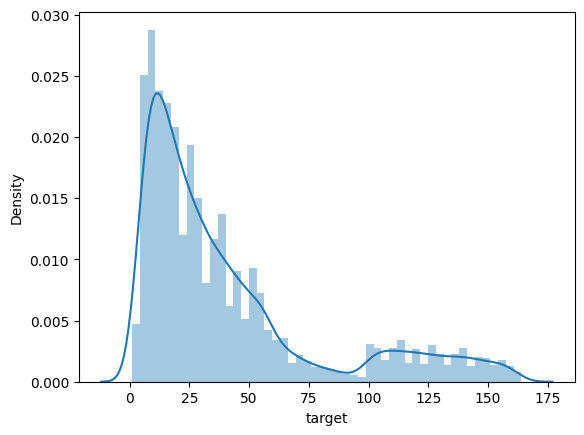

In [29]:
import seaborn as sns
sns.distplot(df_non_zeros_without_outliers["target"], kde=True)

In [30]:
import numpy as np

# Randomly assign negative values between -1 and -165 to all target==0 rows
#zero_mask = all_zeros['target'] == 0
negative_df = all_zeros.loc[:, 'target'] = -np.random.randint(1, 166, size=len(all_zeros))

In [31]:
import numpy as np

# Create a copy of all_zeros and assign random negative values between -1 and -165 to 'target'
all_zeros_negative = all_zeros.copy()
all_zeros_negative['target'] = -np.random.randint(1, 166, size=len(all_zeros_negative))

all_zeros_negative

,id,date,flight_id,departure_point,arrival_point,departure_time,arrival_time,flight_status,aircraft_code,target,...,aircraft_code_TU CR9ISA,aircraft_code_TU CR9XXX,aircraft_code_UG AT7AT7,aircraft_code_UG AT7LBD,aircraft_code_UG AT7LBE,aircraft_code_UG CR9CR9,aircraft_code_UG CR9ISA,aircraft_code_UG CR9XXX,aircraft_code_UJ 320TCF,aircraft_code_X9 320VEB
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,-148,...,False,False,False,False,False,False,False,False,False,False
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,-19,...,False,False,False,False,False,False,False,False,False,False
12,train_id_12,2016-01-20,TU 0913,TUN,MED,2016-01-20 19:40:00,2016-01-21 00:00:00,ATA,TU 320IMR,-30,...,False,False,False,False,False,False,False,False,False,False
13,train_id_13,2016-01-21,TU 0217,IST,TUN,2016-01-21 20:10:00,2016-01-21 23:00:00,ATA,TU 320IMU,-160,...,False,False,False,False,False,False,False,False,False,False
15,train_id_15,2016-01-22,TU 0706,CMN,TUN,2016-01-22 17:45:00,2016-01-22 20:10:00,ATA,TU 320IMR,-3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02:00:00,SCH,TU 32AIML,-68,...,False,False,False,False,False,False,False,False,False,False
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09:00:00,SCH,UG AT7AT7,-72,...,False,False,True,False,False,False,False,False,False,False
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12:50:00,SCH,TU 736IOK,-95,...,False,False,False,False,False,False,False,False,False,False
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18:45:00,ATA,TU CR9ISA,-98,...,True,False,False,False,False,False,False,False,False,False


In [32]:
# Get all positive target values
positive_targets = df_non_zeros_without_outliers[df_non_zeros_without_outliers['target'] > 0]['target'].values

# Sample negative values from positive targets and multiply by -1
all_zeros_negative = all_zeros.copy()
all_zeros_negative['target'] = -np.random.choice(positive_targets, size=len(all_zeros_negative), replace=True)

all_zeros_negative

,id,date,flight_id,departure_point,arrival_point,departure_time,arrival_time,flight_status,aircraft_code,target,...,aircraft_code_TU CR9ISA,aircraft_code_TU CR9XXX,aircraft_code_UG AT7AT7,aircraft_code_UG AT7LBD,aircraft_code_UG AT7LBE,aircraft_code_UG CR9CR9,aircraft_code_UG CR9ISA,aircraft_code_UG CR9XXX,aircraft_code_UJ 320TCF,aircraft_code_X9 320VEB
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,-9.0,...,False,False,False,False,False,False,False,False,False,False
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,-57.0,...,False,False,False,False,False,False,False,False,False,False
12,train_id_12,2016-01-20,TU 0913,TUN,MED,2016-01-20 19:40:00,2016-01-21 00:00:00,ATA,TU 320IMR,-13.0,...,False,False,False,False,False,False,False,False,False,False
13,train_id_13,2016-01-21,TU 0217,IST,TUN,2016-01-21 20:10:00,2016-01-21 23:00:00,ATA,TU 320IMU,-33.0,...,False,False,False,False,False,False,False,False,False,False
15,train_id_15,2016-01-22,TU 0706,CMN,TUN,2016-01-22 17:45:00,2016-01-22 20:10:00,ATA,TU 320IMR,-11.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02:00:00,SCH,TU 32AIML,-50.0,...,False,False,False,False,False,False,False,False,False,False
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09:00:00,SCH,UG AT7AT7,-55.0,...,False,False,True,False,False,False,False,False,False,False
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12:50:00,SCH,TU 736IOK,-49.0,...,False,False,False,False,False,False,False,False,False,False
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18:45:00,ATA,TU CR9ISA,-20.0,...,True,False,False,False,False,False,False,False,False,False


<Axes: xlabel='target', ylabel='Density'>

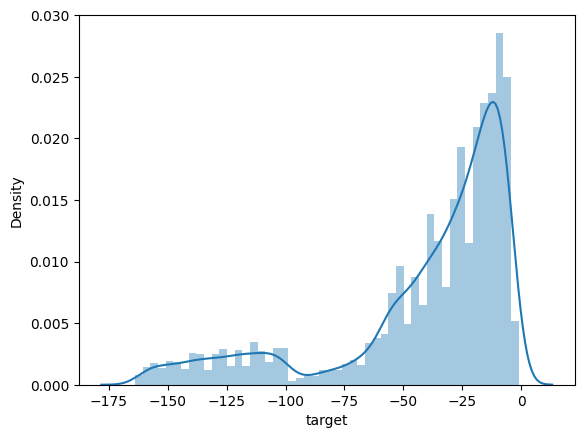

In [33]:
sns.distplot(all_zeros_negative["target"], kde=True)

In [34]:
all_zeros_pos_neg = pd.concat([all_zeros_negative, df_non_zeros_without_outliers], axis=0, ignore_index=True)

In [35]:
all_zeros_pos_neg.describe()

,departure_time,arrival_time,target,duration
count,99747,99747,99747.000000,99747.000000
mean,2017-07-09 22:01:16.100935424,2017-07-10 00:19:38.484164864,9.883094,8302.383230
min,2016-01-01 00:15:00,2016-01-01 04:30:00,-164.000000,600.000000
25%,2016-10-03 07:30:00,2016-10-03 09:25:00,-17.000000,5700.000000
50%,2017-07-24 20:15:00,2017-07-24 23:45:00,11.000000,8400.000000
75%,2018-04-05 10:15:00,2018-04-05 12:32:30,35.000000,9900.000000
max,2018-12-31 23:10:00,2019-01-01 03:50:00,164.000000,67740.000000
std,NaN,NaN,55.597951,4671.150033


<Axes: xlabel='target', ylabel='Density'>

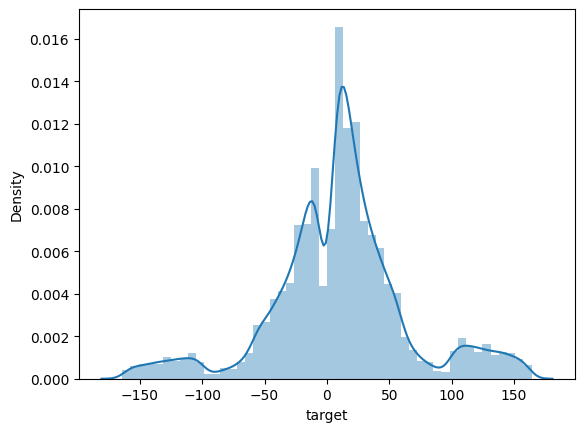

In [36]:
sns.distplot(all_zeros_pos_neg["target"], kde=True)

In [37]:
all_zeros_pos_neg.head()

,id,date,flight_id,departure_point,arrival_point,departure_time,arrival_time,flight_status,aircraft_code,target,...,aircraft_code_TU CR9ISA,aircraft_code_TU CR9XXX,aircraft_code_UG AT7AT7,aircraft_code_UG AT7LBD,aircraft_code_UG AT7LBE,aircraft_code_UG CR9CR9,aircraft_code_UG CR9ISA,aircraft_code_UG CR9XXX,aircraft_code_UJ 320TCF,aircraft_code_X9 320VEB
0,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,-9.0,...,False,False,False,False,False,False,False,False,False,False
1,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,-57.0,...,False,False,False,False,False,False,False,False,False,False
2,train_id_12,2016-01-20,TU 0913,TUN,MED,2016-01-20 19:40:00,2016-01-21 00:00:00,ATA,TU 320IMR,-13.0,...,False,False,False,False,False,False,False,False,False,False
3,train_id_13,2016-01-21,TU 0217,IST,TUN,2016-01-21 20:10:00,2016-01-21 23:00:00,ATA,TU 320IMU,-33.0,...,False,False,False,False,False,False,False,False,False,False
4,train_id_15,2016-01-22,TU 0706,CMN,TUN,2016-01-22 17:45:00,2016-01-22 20:10:00,ATA,TU 320IMR,-11.0,...,False,False,False,False,False,False,False,False,False,False


In [38]:
from sklearn.preprocessing import power_transform
box_cox = power_transform(all_zeros_pos_neg[['target']], method='yeo-johnson')

<Axes: ylabel='Density'>

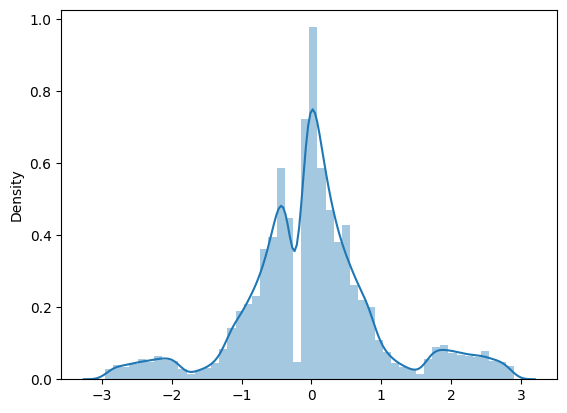

In [39]:
sns.distplot(box_cox, kde=True)

In [40]:
y_pos_neg = all_zeros_pos_neg['target']
X_pos_neg = all_zeros_pos_neg.drop(columns=['id', 'date', 'flight_id', 'departure_time', 'arrival_time', 'target'] + cat_col)

X_train_pos_neg, X_test_pos_neg, y_train_pos_neg, y_test_pos_neg = train_test_split(X_pos_neg, y_pos_neg, test_size=0.2, random_state=42)

In [41]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_pos_neg, y_train_pos_neg)

KNeighborsRegressor()

In [42]:
y_pos_neg_pred = knn_model.predict(X_test_pos_neg)

KNeighborsRegressor: Root Mean Squared Error: 53.87
KNeighborsRegressor: R2 Score: 0.06


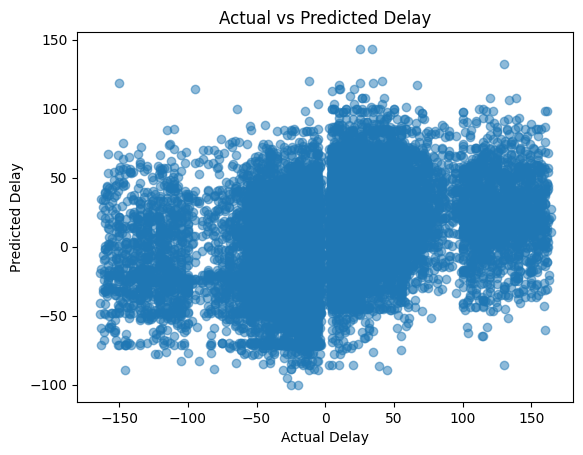

In [43]:
# Print model scores
model_score(knn_model, y_test_pos_neg, y_pos_neg_pred)
# Visualize predictions vs actual
plot_actual_Vs_predicted(y_test_pos_neg, y_pos_neg_pred)

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_pos_neg, y_train_pos_neg)

print("Best parameters:", grid_search.best_params_)
print("Best RMSE (CV):", -grid_search.best_score_)

# Train final model with best parameters
cv_knn_model = grid_search.best_estimator_
y_pos_neg_pred = cv_knn_model.predict(X_test_pos_neg)



KeyboardInterrupt: 

In [ ]:
# Print model scores
model_score(rs.best_estimator_, y_test_pos_neg, y_pos_neg_pred)
# Visualize predictions vs actual
plot_actual_Vs_predicted(y_test_pos_neg, y_pos_neg_pred)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter grid
param_grid = {
    'n_estimators': np.arange(10, 201).astype(int),
    'max_depth': [None] + list(np.arange(3, 21).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.arange(10, 51).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 42)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 5, random_state=42)

# Fit 
rs.fit(X_train_pos_neg, y_train_pos_neg)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24,...
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200])},
                   random_state=42, scoring='roc_auc', verbose=5)

RandomForestClassifier: Root Mean Squared Error: 39.04
RandomForestClassifier: R2 Score: -0.14


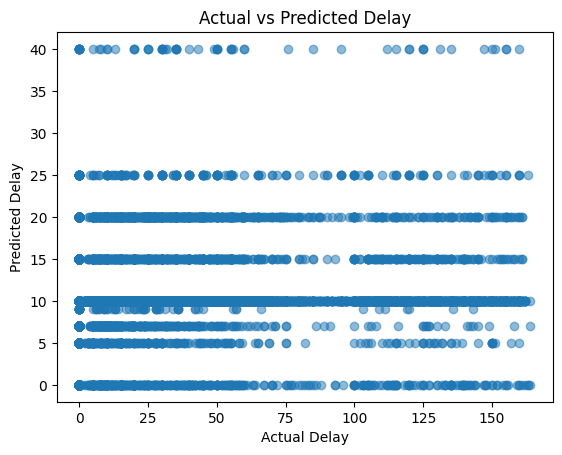

Root Mean Squared Error (RandomizedSearchCV): 39.04


In [55]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict using the best estimator from RandomizedSearchCV
y_rs_pred = rs.best_estimator_.predict(X_test_pos_neg)
y_rs_pred[y_rs_pred < 0] = 0
y_test_pos_neg = y_test_pos_neg.clip(lower=0)

# Print model scores
model_score(rs.best_estimator_, y_test_pos_neg, y_rs_pred)
# Visualize predictions vs actual
plot_actual_Vs_predicted(y_test_pos_neg, y_rs_pred)

rmse_rs = np.sqrt(mean_squared_error(y_test_pos_neg, y_rs_pred))
print(f"Root Mean Squared Error (RandomizedSearchCV): {rmse_rs:.2f}")

In [47]:
# Import XGBoost
from xgboost import XGBRegressor

# Fit model to training data
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, eval_metric='logloss', random_state=42, n_jobs=-1, verbosity=0, tree_method='hist', max_depth=3)
xgb_model = xgb.fit(X_train_pos_neg, y_train_pos_neg)

In [48]:
#hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5, 1],
    'min_child_weight': [1, 3, 5, 7],
    'scale_pos_weight': [1, 2, 3]
}

In [49]:
from sklearn.model_selection import RandomizedSearchCV
xgb_rscv = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, 
                          n_iter=100, scoring='accuracy', cv=3, 
                          verbose=1, random_state=42, n_jobs=-1)
xgb_rscv.fit(X_train_pos_neg, y_train_pos_neg)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='logloss',
                                          feature_types=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_...
                                          predictor=None, random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.5, 1],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [50, 100, 200, 300],
                                        'scale_pos_weight': [1, 2, 3],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

XGBRegressor: Root Mean Squared Error: 35.73
XGBRegressor: R2 Score: 0.04


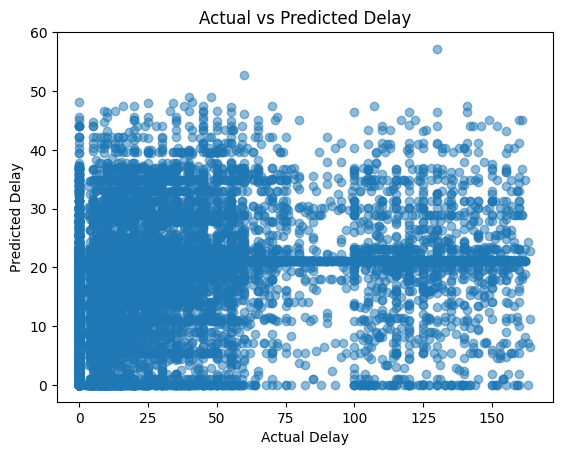

In [50]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on the test set using the fitted XGBRegressor
y_xgb_pred = xgb_model.predict(X_test_pos_neg)
y_xgb_pred[y_xgb_pred < 0] = 0
y_test_pos_neg = y_test_pos_neg.clip(lower=0)

# Print model scores
model_score(xgb_model, y_test_pos_neg, y_xgb_pred)
# Visualize predictions vs actual
plot_actual_Vs_predicted(y_test_pos_neg, y_xgb_pred)

In [51]:
y_xgb_pred[y_xgb_pred < 0] = 0
y_test_pos_neg = y_test_pos_neg.clip(lower=0)

In [52]:
y_xgb_pred.min()

0.0

In [53]:
y_test_pos_neg.min()

0.0